<img style="float: center;" src='https://avatars.githubusercontent.com/u/121973992?s=400&u=0cd6b57216ab047c8b7b93b26a6e91f1d29d719d&v=4' alt="goals_logo" width="90px"/> 

<a id="title_ID"></a>
# CAFE tutorial on 1D spectral fit #

**Author**: Thomas Lai & Tanio Diaz-Santos
<br>
**Last Updated**: Dec. 8, 2023

<hr style="border:1px solid gray"> </hr>

1.<font color='white'>-</font>Imports <a class="anchor" id="intro"></a>
------------------

In [1]:
import os
import sys
import zipfile
import site
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker
from matplotlib.backends.backend_pdf import PdfPages
from astropy.utils.data import download_file

from astropy.io import ascii
from astropy.table import Table
from astropy.table import QTable

import CAFE
import CRETA
from CAFE.cafe_io import *
from CAFE.cafe_helper import *

import CAFE.cafe as cafe
import CRETA.creta as creta

# %matplotlib widget

User API Created


2.<font color='white'>-</font>Download the MIRI IFU extracted 1D spectrum and use it as the input of the CAFE fit<a class="anchor" id="intro"></a>
------------------

In [2]:
# Create folders for input/output data
data_path = './input_data/'
cafe_output_path = './cafe_output/'

if not os.path.exists(data_path):
    os.makedirs(data_path)
else:
    print("Input Data folder already exists.")

if not os.path.exists(cafe_output_path):
    os.makedirs(cafe_output_path)
else:
    print("CAFE Output folder already exists.")

Input Data folder already exists.
CAFE Output folder already exists.


** Download the spectrum ** <br>
Download the NGC 7469 1D spectrum from BOX
https://caltech.box.com/s/ss61vynjd51o5211llrefu9bl2e8mx4z and save the data under ./input_spec/.
<br>


In [3]:
# set the Box link and file name
link = 'https://caltech.box.com/shared/static/ltioy181o3lkwxejizn4qy5bccs0dsc3.dat'
filename = 'NGC7469_SingleExt_r1.5as.dat'
if not os.path.isfile(os.path.join(data_path, filename)):
    print('Downloading {}...'.format(filename))
    demo_file = download_file(link, cache=True)
    # Make a symbolic link using a local name for convenience
    os.symlink(demo_file, os.path.join(data_path, filename))
else:
    print('{} already exists, skipping download...'.format(filename))

NGC7469_SingleExt_r1.5as.dat already exists, skipping download...


2.<font color='white'>-</font>CAFE Configuration <a class="anchor" id="intro"></a>
------------------

In [4]:
# Get CAFE directory from site-packages
cafe_dir = site.getsitepackages()[0]+'/CAFE/'
creta_dir = site.getsitepackages()[0]+'/CRETA/'

3.<font color='white'>-</font>CAFE FITTING <a class="anchor" id="intro"></a>
------------------

In [5]:
# Set the redshift of the source
z = 0.0163

# Setup data directory and file name, and parameter files.
source_fd = data_path
source_fn = 'NGC7469_SingleExt_r1.5as.dat'

inppar_fn = cafe_dir+'inp_parfiles/inpars_jwst_nirspec-miri_AGN.ini'
optpar_fn = cafe_dir+'opt_parfiles/default_opt.cafe'

# Initialize the CAFE fitting module
s = cafe.specmod(cafe_dir)

In [ ]:
# Read in the spec
s.read_spec(source_fn, file_dir=source_fd, z=z)

# Preview the spectrum and overlay the initial params
s.plot_spec_ini(inppar_fn, optpar_fn)

In [11]:
# Fit the spectrum
s.fit_spec(inppar_fn, optpar_fn, output_path=cafe_output_path)

Generating parameter cube with initial/full parameter object
The parameter object has 88 lines (of which 21 have double components), 29 PAHs, 5 extra opacity features, 42 continuum parameters, and the VGRAD parameter
Generating parameter object
Out of 88 lines set to be fitted, 16 returned negative values while guessing their peaks, so they will not be fitted. These are:
['SXIII_28926' 'H200S12_39947' 'Brackett54_40523' 'SIX_46413' 'SIX_46585'
 'FeII_46719' 'SIX_47227' 'SVII_47307' 'FeII_48891' 'SiVIII_50019'
 'SVII_50027' 'FeII_50624' 'SVII_52334' 'MgVII_90090' 'NaIV_90410'
 'CoIII_118900']
If you think this is incorrect, please double check the input redshift and fine tune it
The parameter object has 72 lines (of which 18 have double components), 29 PAHs, 5 extra opacity features, 42 continuum parameters, and the VGRAD parameter
Generating continuum profiles
ISRF
ISRF
Fitting 415 parameters
Iteration 1 / 5(max): 2024-01-29 20:34:10.346976 -------------
The fitter reached a solution a

/Users/tanio/Sync/pywork/CAFE/CAFE/cafe_io.py:294: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wave = p.filter(like='Wave', axis=0).value[0] * u.micron
/Users/tanio/Sync/pywork/CAFE/CAFE/cafe_io.py:296: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gamma = p.filter(like='Gamma', axis=0).value[0]
/Users/tanio/Sync/pywork/CAFE/CAFE/cafe_io.py:298: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  peak = p.filter(like='Peak', axis=0).val

In [12]:
# Line and PAH averaged velocity shift/gradient with respect to the input redshift, in [km/s]
print(s.parcube['VALUE'].data[-1,0,0])

9.721246471391552
3.242577208602919e-05


ISRF
ISRF


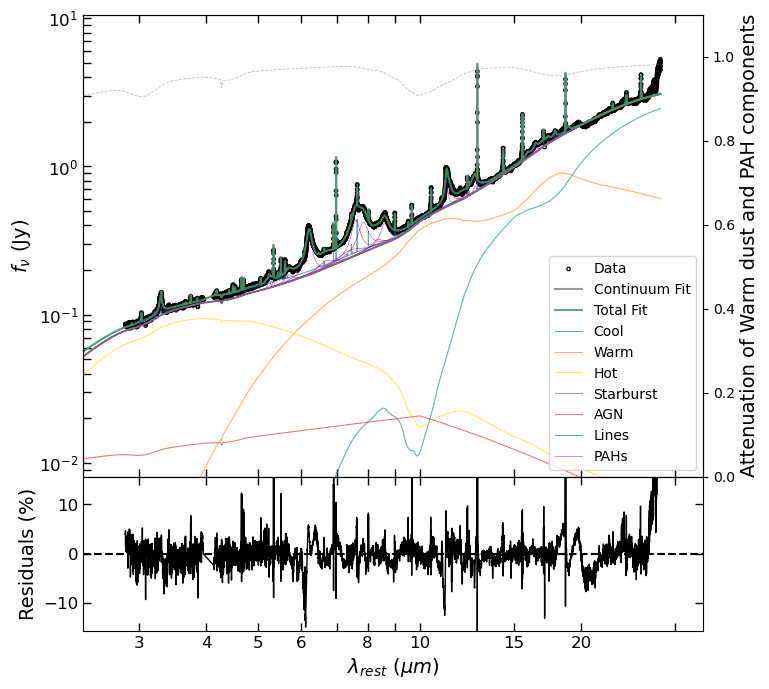

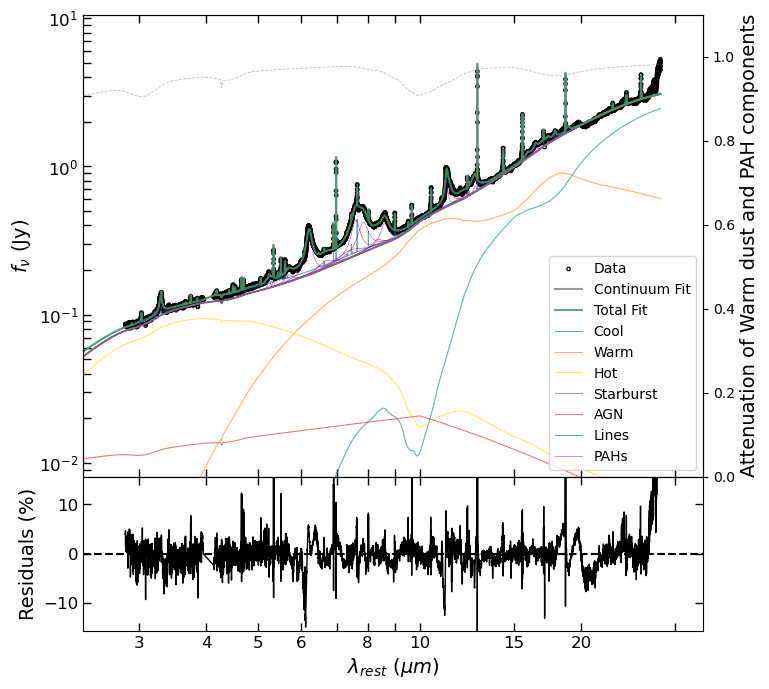

In [13]:
# Plot fitted spectrum
s.plot_spec_fit(inppar_fn, optpar_fn)

4.<font color='white'>-</font>RESTORE CAFE SESSION FROM DISK <a class="anchor" id="intro"></a>
------------------

In [6]:
# Set up directories
source_fnb = 'p'.join(source_fn.split('.')[0:-1])
parcube_fd = cafe_output_path+source_fnb+'/'
parcube_fn = source_fnb+'_parcube.fits'

In [7]:
# Load the the spectrum
s.read_spec(source_fn, file_dir=source_fd, z=z)

Load data: ./input_data/NGC7469_SingleExt_r1.5as.dat


In [8]:
# Load the parameter cube from disk
s.read_parcube_file(parcube_fn, file_dir=parcube_fd)

Filename: ./cafe_output/NGC7469_SingleExt_r1p5as/NGC7469_SingleExt_r1p5as_parcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  VALUE         1 ImageHDU         9   (1, 1, 472)   float64   
  2  STDERR        1 ImageHDU         9   (1, 1, 472)   float64   
  3  VARY          1 ImageHDU         9   (1, 1, 472)   float64   
  4  MIN           1 ImageHDU         9   (1, 1, 472)   float64   
  5  MAX           1 ImageHDU         9   (1, 1, 472)   float64   
  6  EXPR          1 BinTableHDU     13   472R x 2C   [I, 24A]   
  7  PARNAME       1 BinTableHDU     13   472R x 2C   [I, 32A]   


ISRF
ISRF


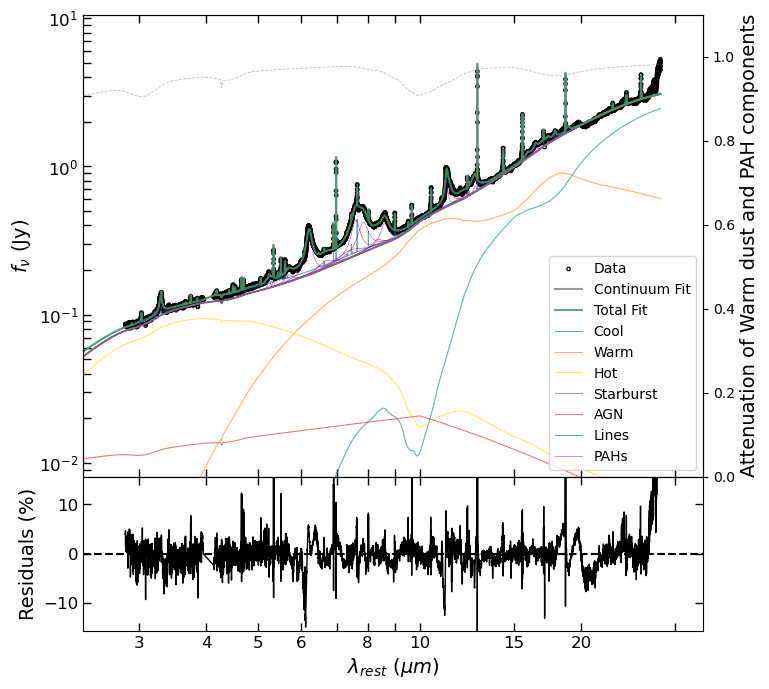

In [9]:
# Plot the previous fit
s.plot_spec_fit(inppar_fn, optpar_fn)

In [10]:
# One may want to fit again the spectrum but using as an initial guess the result from the fit of another spectrum
# (or from a previous fit from the same spectrum, although this is not recommended as most parameters have been already optimized and that gives trouble to LMFIT)
# For this example case, nevertheless, we use the previous fit from the same spectrum

In [11]:
# Note this is technically unnecessary if the initalization is done with the same spectrum, since the parameter cube is already loaded in s.parcube, but for completeness:
ini = cafe.specmod(cafe_dir)
ini.read_parcube_file(parcube_fn, file_dir=parcube_fd)

Filename: ./cafe_output/NGC7469_SingleExt_r1p5as/NGC7469_SingleExt_r1p5as_parcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  VALUE         1 ImageHDU         9   (1, 1, 472)   float64   
  2  STDERR        1 ImageHDU         9   (1, 1, 472)   float64   
  3  VARY          1 ImageHDU         9   (1, 1, 472)   float64   
  4  MIN           1 ImageHDU         9   (1, 1, 472)   float64   
  5  MAX           1 ImageHDU         9   (1, 1, 472)   float64   
  6  EXPR          1 BinTableHDU     13   472R x 2C   [I, 24A]   
  7  PARNAME       1 BinTableHDU     13   472R x 2C   [I, 32A]   


Generating continuum profiles for guess model from the .ini file
Out of 88 lines set to be fitted, 16 returned negative values while guessing their peaks, so they will not be fitted. These are:
['SXIII_28926' 'H200S12_39947' 'Brackett54_40523' 'SIX_46413' 'SIX_46585'
 'FeII_46719' 'SIX_47227' 'SVII_47307' 'FeII_48891' 'SiVIII_50019'
 'SVII_50027' 'FeII_50624' 'SVII_52334' 'MgVII_90090' 'NaIV_90410'
 'CoIII_118900']
If you think this is incorrect, please double check the input redshift and fine tune it
The parameter object has 72 lines (of which 18 have double components), 29 PAHs, 5 extra opacity features, 42 continuum parameters, and the VGRAD parameter
The initial parameters will be set to the values from the parameter cube provided
The parameter object has 72 lines (of which 18 have double components), 29 PAHs, 5 extra opacity features, 42 continuum parameters, and the VGRAD parameter
ISRF
ISRF


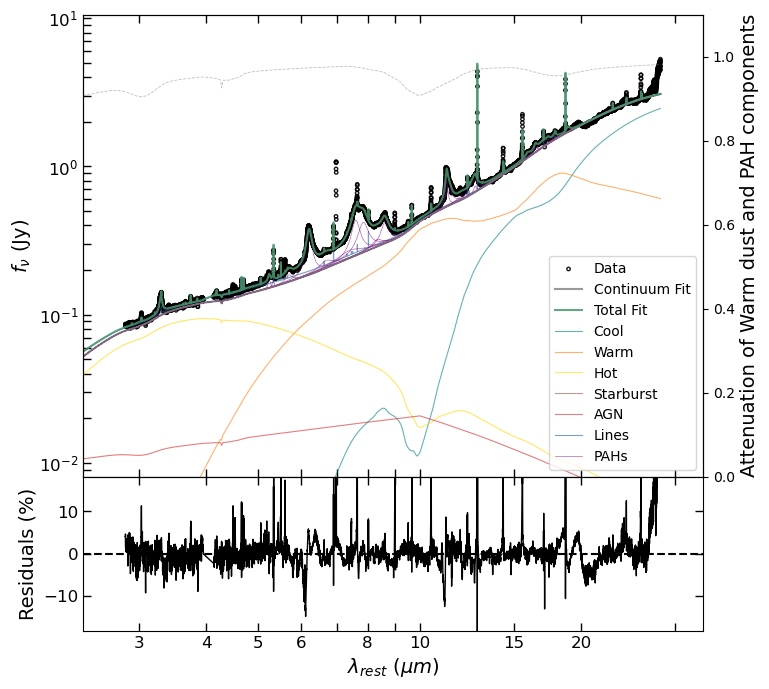

In [13]:
# Plot the initialized spectrum (should be the same as the fitted spectrum above)
s.plot_spec_ini(inppar_fn, optpar_fn, init_parcube=ini.parcube)

In [16]:
# Refit using the last fit results as initialization
s.fit_spec(inppar_fn, optpar_fn, init_parcube=ini.parcube, output_path=cafe_output_path)

The parameter object has 88 lines (of which 21 have double components), 29 PAHs, 5 extra opacity features, 42 continuum parameters, and the VGRAD parameter
Generating parameter cube with initial/full parameter object, containing 472 parameters
Generating parameter object
Out of 88 lines set to be fitted, 16 returned negative values while guessing their peaks, so they will not be fitted. These are:
['SXIII_28926' 'H200S12_39947' 'Brackett54_40523' 'SIX_46413' 'SIX_46585'
 'FeII_46719' 'SIX_47227' 'SVII_47307' 'FeII_48891' 'SiVIII_50019'
 'SVII_50027' 'FeII_50624' 'SVII_52334' 'MgVII_90090' 'NaIV_90410'
 'CoIII_118900']
If you think this is incorrect, please double check the input redshift and fine tune it
The parameter object has 72 lines (of which 18 have double components), 29 PAHs, 5 extra opacity features, 42 continuum parameters, and the VGRAD parameter
The params will be set to the parameters of the parcube provided for initialization
The parameter object has 72 lines (of which 18

/Users/tanio/Sync/pywork/CAFE/CAFE/cafe_io.py:294: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wave = p.filter(like='Wave', axis=0).value[0] * u.micron
/Users/tanio/Sync/pywork/CAFE/CAFE/cafe_io.py:296: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gamma = p.filter(like='Gamma', axis=0).value[0]
/Users/tanio/Sync/pywork/CAFE/CAFE/cafe_io.py:298: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  peak = p.filter(like='Peak', axis=0).val

In [17]:
# Line and PAH averaged velocity gradient wrt z, in [km/s]
print(s.parcube['VALUE'].data[-1,0,0])

9.661348644466345


ISRF
ISRF


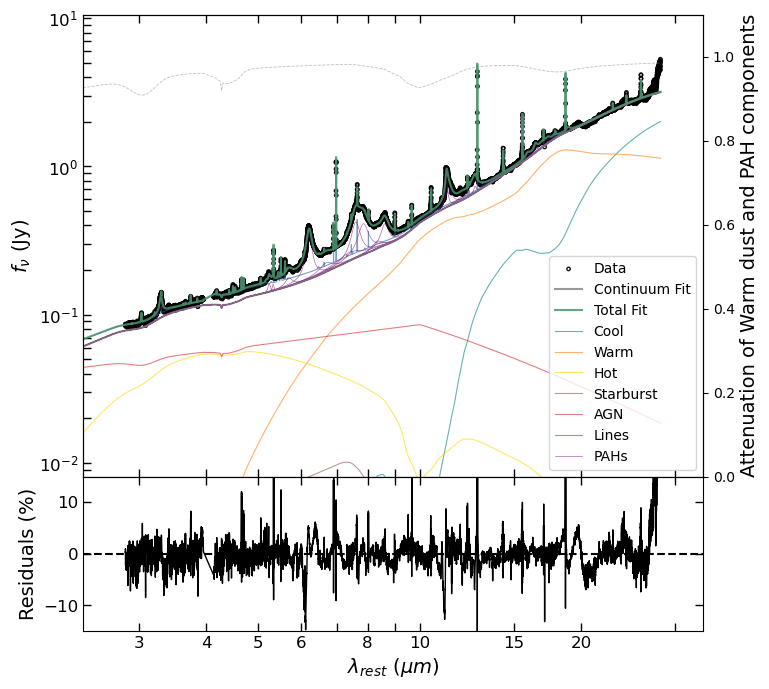

In [18]:
s.plot_spec_fit(inppar_fn, optpar_fn)